<a href="https://colab.research.google.com/github/venkatviswa/SP25_DS6050/blob/main/flow_chart_data_set.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install kagglehub

In [ ]:
import os
import PIL
import pickleshare
import kagglehub
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

import matplotlib.pyplot as plt
import numpy as np

In [ ]:
# Download latest version
path = kagglehub.dataset_download("yaswanthkrishna2002/flowcharts-dataset")

print("Path to dataset files:", path)

100%|██████████| 74.8M/74.8M [00:00<00:00, 197MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/yaswanthkrishna2002/flowcharts-dataset/versions/3


In [ ]:
from pathlib import Path
import json
data_dir_train = Path("/root/.cache/kagglehub/datasets/yaswanthkrishna2002/flowcharts-dataset/versions/3/Flow chart detection.v2i.darknet/train")

In [ ]:
from pathlib import Path
import json
data_dir_test = Path("/root/.cache/kagglehub/datasets/yaswanthkrishna2002/flowcharts-dataset/versions/3/Flow chart detection.v2i.darknet/test")

In [ ]:
from pathlib import Path
import json
data_dir_valid = Path("/root/.cache/kagglehub/datasets/yaswanthkrishna2002/flowcharts-dataset/versions/3/Flow chart detection.v2i.darknet/valid")

In [ ]:
data_dir_train

PosixPath('/root/.cache/kagglehub/datasets/yaswanthkrishna2002/flowcharts-dataset/versions/3/Flow chart detection.v2i.darknet/train')

In [ ]:
flowcharts = list(data_dir_train.glob('*.jpg'))

In [ ]:
flowcharts[0:5]

[PosixPath('/root/.cache/kagglehub/datasets/yaswanthkrishna2002/flowcharts-dataset/versions/3/Flow chart detection.v2i.darknet/train/192_png_jpg.rf.812b5391944afe1fcb0c71a713c33457.jpg'),
 PosixPath('/root/.cache/kagglehub/datasets/yaswanthkrishna2002/flowcharts-dataset/versions/3/Flow chart detection.v2i.darknet/train/215_png_jpg.rf.a3f000916f9d65484a48e5fa138cfa3e.jpg'),
 PosixPath('/root/.cache/kagglehub/datasets/yaswanthkrishna2002/flowcharts-dataset/versions/3/Flow chart detection.v2i.darknet/train/419_png_jpg.rf.c76e27a010fa892ba30b7d87fff47367.jpg'),
 PosixPath('/root/.cache/kagglehub/datasets/yaswanthkrishna2002/flowcharts-dataset/versions/3/Flow chart detection.v2i.darknet/train/109_png_jpg.rf.7074f5b50219db3d2fa400925e74d721.jpg'),
 PosixPath('/root/.cache/kagglehub/datasets/yaswanthkrishna2002/flowcharts-dataset/versions/3/Flow chart detection.v2i.darknet/train/449_jpeg_jpg.rf.f18ccb4564c8c18bd4d4118905a2f4b8.jpg')]

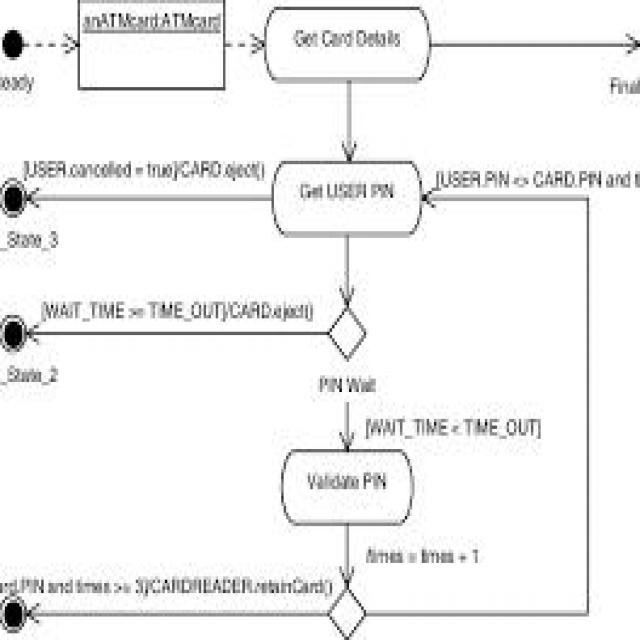

In [ ]:
PIL.Image.open(str(flowcharts[2]))

## Load data using a Keras utility
  
Next, load these images off disk using the helpful `tf.keras.utils.image_dataset_from_directory` utility. This will take you from a directory of images on disk to a `tf.data.Dataset` in just a couple lines of code.

In [ ]:
batch_size = 32
img_height = 180
img_width = 180

In [ ]:
train_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  labels=None,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 1503 files.


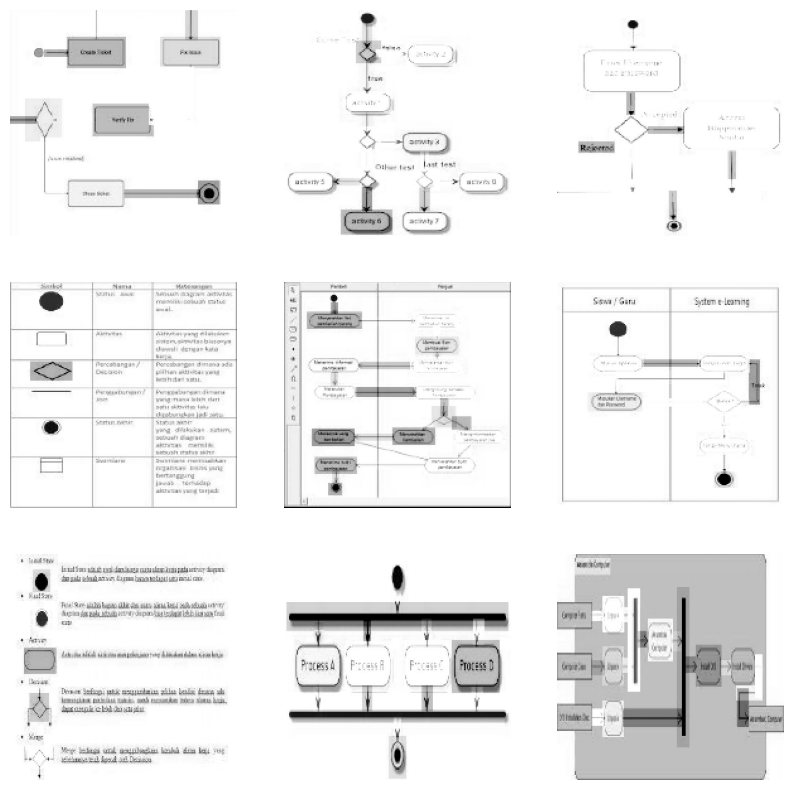

In [ ]:
plt.figure(figsize=(10, 10))
for images in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
   #plt.title(class_names[labels[i]])
    plt.axis("off")